# **ITESM Campus Guadalajara**
## Aprendizaje de Máquinas
## Tarea 2 Regresión Lineal Múltiple

### **A00540988 Luis Francisco González Rodíguez**


---



# 1.  En este ejercicio usaremos la base de datos de Boston_housing_dataset (https://www.kaggle.com/apratim87/housingdata) la cual consta de 13 variables independientes y la variable dependiente. Son 506 datos de casas cuyo objetivo es la predicción de su costo (MEDV).

In [28]:
# Carga de librerias necesarias para leer y procesar los datos.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

#Cargar Data Set tal como se decargóó del sitio de Kaggle
!curl -O https://raw.githubusercontent.com/Fragonz/MCC/master/Tarea2-RLM/data/datasets_270_583_housingdata.csv
!ls
!pwd
dspath = "/content/datasets_270_583_housingdata.csv"


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 35136  100 35136    0     0   252k      0 --:--:-- --:--:-- --:--:--  252k
datasets_270_583_housingdata.csv  sample_data
/content


**Examinemos el Data Set para ver su contenido.**



In [48]:
mydata = pd.read_csv(dspath, header=None)
mydata.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


---
Después de examinar el dataset podemos comprobar que este archivo no contiene **headers** y debemos agregarlos siguiendo las instrucciones del sitio de Keggle: https://www.kaggle.com/apratim87/housingdata?select=housingdata.csv el cual nos dice que las columnas estan en orden y con las siguientes etiquetas:

**Variables in order:**

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* CHAS - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full value property tax rate per 10'000
* PTRATIO - pupil teacher ratio by town
* B 1000 - (Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT % - lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

---

In [50]:
# Agregamos las etiquetas a las columnas 
column_labels=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","BK","LSTAT","MEDV"]
mydata.columns = column_labels

**Revisamos nuestro dataset con los nombres de columnas para poder manipular nuestros datos:**

---

In [51]:
mydata.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BK,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [52]:
# Examinemos el tamaño del DataSet para corroborar que tenemos 506 Datos
# Además contamos con 14 columnas:
# 13 que corresponden a variables independientes y 1 variable dependiente.

mydata.shape

(506, 14)

## a.  Obtener el modelo de Regresión Lineal Múltiple (RLM) del modelo y con base a dicho modelo contestar los siguientes incisos:

In [54]:
# Dataset con el que vamos a trabajar
dataset = pd.DataFrame(mydata[["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","BK","LSTAT","MEDV"]])
# Variables Independientes
x = dataset[["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","BK","LSTAT"]]
# Variable Dependiente
y = dataset[["MEDV"]]

In [55]:
# Agregamos 1's a la primer columna como cosntante
xones = sm.add_constant(x)
print(xones)

     const     CRIM    ZN  INDUS  CHAS  ...  RAD  TAX  PTRATIO      BK  LSTAT
0      1.0  0.00632  18.0   2.31     0  ...    1  296     15.3  396.90   4.98
1      1.0  0.02731   0.0   7.07     0  ...    2  242     17.8  396.90   9.14
2      1.0  0.02729   0.0   7.07     0  ...    2  242     17.8  392.83   4.03
3      1.0  0.03237   0.0   2.18     0  ...    3  222     18.7  394.63   2.94
4      1.0  0.06905   0.0   2.18     0  ...    3  222     18.7  396.90   5.33
..     ...      ...   ...    ...   ...  ...  ...  ...      ...     ...    ...
501    1.0  0.06263   0.0  11.93     0  ...    1  273     21.0  391.99   9.67
502    1.0  0.04527   0.0  11.93     0  ...    1  273     21.0  396.90   9.08
503    1.0  0.06076   0.0  11.93     0  ...    1  273     21.0  396.90   5.64
504    1.0  0.10959   0.0  11.93     0  ...    1  273     21.0  393.45   6.48
505    1.0  0.04741   0.0  11.93     0  ...    1  273     21.0  396.90   7.88

[506 rows x 14 columns]


### **Primer Modelo de Regresión Lineal Múltile (RLM)**

In [57]:
mymodel = sm.OLS(y, xones).fit()
print(mymodel.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          6.72e-135
Time:                        04:07:30   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

### i.   Interpretar el valor del coeficiente de determinación ajustado 𝑅²

El coeficiente de determinación ajustado para nuestro modelo fue de 0.734, recordemos que este mide el porcentaje de variación de la variable dependiente teniendo en cuenta las variable independientes, es decir la variación es del 73.4% 

### ii. Determina qué variables no resultaron significativas considerendo un 𝑣𝑎𝑙𝑜𝑟-𝑝=0.01 

Por observación en la tabla de nuestro modelo podemos concluir que las variables que no resultaron significativas, o con un *p-value* superior a 0.01 son **INDUS** con un *p-value* de 0.738 y **AGE** con un *p-value* de 0.958

### iii. Obtener un segundo modelo de RLM omitiendo las variables que no resultaron significativas en el inciso anterior. Comparar su coeficiente de determinación ajustado con base con respecto al primer modelo.

Para obtener un segundo modelo RLM, repetiremos los pasos del primer punto, pero esta vez removeremos las variables **INDUS** y **AGE**, las cuales resultaron NO significativas para nuestro modelo.

In [58]:
# Repetimos los pasos de nuestro modelo anterior
# Definimos el DF para el dataset con el que vamos a trabajar
dataset = pd.DataFrame(mydata[["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","BK","LSTAT","MEDV"]])
# De nuestras variable independeintes removemos las variable INDUS y AGE que resultaron NO significativas para nuestro modelo
x = dataset[["CRIM","ZN","CHAS","NOX","RM","DIS","RAD","TAX","PTRATIO","BK","LSTAT"]]
# Definimos variable dependiente
y = dataset[["MEDV"]]

#### **Segundo Modelo RLM**

In [59]:
# Agregamos 1's a la primer columna como cosntante
xones = sm.add_constant(x)
# Entrenamos nuestro modelo
mymodel = sm.OLS(y, xones).fit()
# Imprimimos los resultados
print(mymodel.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          5.54e-137
Time:                        04:49:22   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3411      5.067      7.171      0.0

#### **Comparar coeficiente de determinación ajustado con respecto al primer modelo**

* Coeficiente 𝑅² Ajustado primer modelo = 73.4%
* Coeficiente 𝑅² Ajustado segundo modelo = 73.5%

Esto significa que tuvimos una mejora de 0.001 al elininar dos variables, esto parece algo pequeño pero ahora podemos trabajar con un modelo de 11 variable y no de 13 como originalmente se había planteado.


### iv. Obtener la matriz de correlación de Pearson de las 14 variables. Con base a dicha matriz identifica ***los pares de variables independientes*** que tengan un coeficiente de correlación mayor o igual a 0.7 en valor absoluto. Obtener un tercer modelo de RLM y compara la significacia de los coeficientes y su coeficiente de determinación ajustado con respecto a los dos primeros modelos.

In [60]:
# Dataset con el que vamos a trabajar
dataset = pd.DataFrame(mydata[["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","BK","LSTAT","MEDV"]])
# Correlación de Pearson
dataset.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BK,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


#### **Matriz de Correlación Pearson**

Una forma de ver la relación de las variable usando matplot y mapas de calor, lo que nos permite rápidamente identificar aquellas variables que tienen mayor relación entre sí. De igual manera podemos observar cláramente la diagonal, donde la relacón es 1 dado que comparamos la relación de cada variable consigo misma.

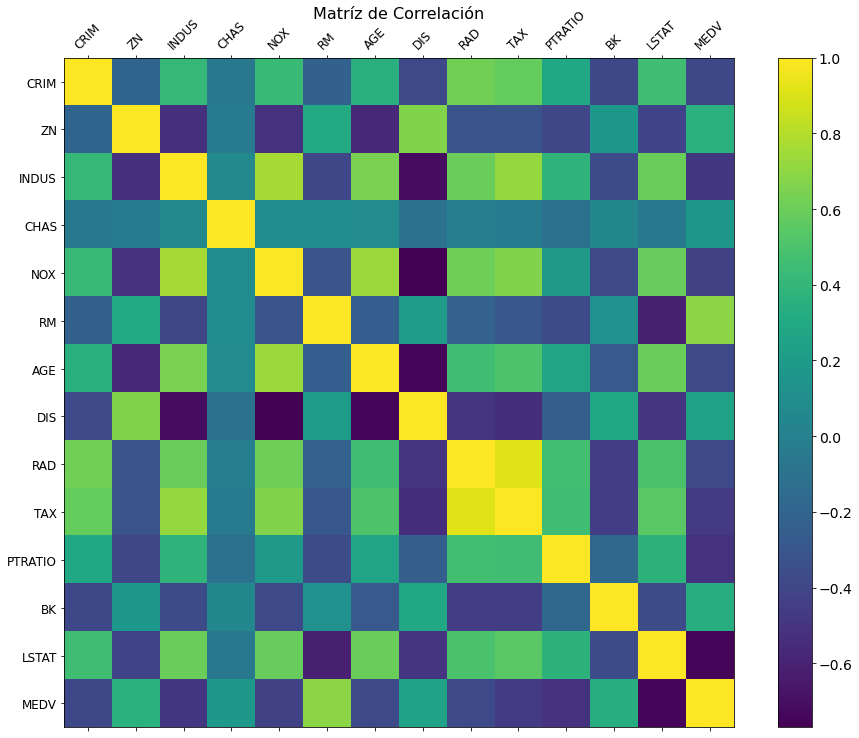

In [119]:
import matplotlib.pyplot as plt

# Gráfica sencilla
#plt.matshow(dataset.corr(method='pearson'))
#plt.show()

df = dataset
f = plt.figure(figsize=(16, 12))
plt.matshow(df.corr(method='pearson'), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=12, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Matríz de Correlación', fontsize=16);

#### **Variables independientes con un coeficiente de correlación mayor o igual a 0.7 en valor absoluto.**

In [99]:
# Obtenemos valor absoluto de las variables
correl_matrix = dataset.corr(method='pearson').abs()
correl_pairs = correl_matrix.unstack()
# Eliminamos los pares de variables que tienen relación consigo mismas (diagonal)
independent_pairs = correl_pairs[correl_pairs < 1]
# Identificamos aquellos pares de variable cuya correlación es mayor o igual a 0.7
independent_pairs = independent_pairs[correl_pairs >= 0.7]
print(independent_pairs)

INDUS  NOX      0.763651
       DIS      0.708027
       TAX      0.720760
NOX    INDUS    0.763651
       AGE      0.731470
       DIS      0.769230
AGE    NOX      0.731470
       DIS      0.747881
DIS    INDUS    0.708027
       NOX      0.769230
       AGE      0.747881
RAD    TAX      0.910228
TAX    INDUS    0.720760
       RAD      0.910228
LSTAT  MEDV     0.737663
MEDV   LSTAT    0.737663
dtype: float64


Las variables significativas para nuestro modelo son:
* INDUS
* NOX
* AGE
* DIS
* RAD
* TAX
* LSTAT

#### **Tercer modelo de RLM**

In [93]:
# Repetimos los pasos de nuestro primer modelo
# Definimos el DF para el dataset con el que vamos a trabajar
dataset = pd.DataFrame(mydata[["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","BK","LSTAT","MEDV"]])
# De nuestras variable independeintes removemos las variable cuya correlación fue menor 0.7
x = dataset[["INDUS","NOX","AGE","DIS","RAD","TAX","LSTAT"]]
# Definimos variable dependiente
y = dataset[["MEDV"]]

In [94]:
# Agregamos 1's a la primer columna como cosntante
xones = sm.add_constant(x)
# Entrenamos nuestro modelo
mymodel = sm.OLS(y, xones).fit()
# Imprimimos los resultados
print(mymodel.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     106.1
Date:                Mon, 31 Aug 2020   Prob (F-statistic):           1.56e-94
Time:                        06:44:18   Log-Likelihood:                -1609.3
No. Observations:                 506   AIC:                             3235.
Df Residuals:                     498   BIC:                             3268.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.1128      2.767     17.389      0.0

#### **Comprar significancia de los coeficientes y su coeficiente de determinación ajustado con respecto a los primeros modelos.**

**Modelo 1**
* Coeficiente 𝑅² = 0.741
* Coeficiente 𝑅² Ajustado = 0.734

**Modelo 2**
* Coeficiente 𝑅² = 0.741
* Coeficiente 𝑅² Ajustado = 0.735

**Modelo 3**
* Coeficiente 𝑅² = 0.599
* Coeficiente 𝑅² Ajustado = 0.593

Comparamos los resultados vemos que nuestro tercer modelo tiene un menor desempeño que los dos modelos anteriores, esto tiene sentido ya que ahora sólo usamos 7 variables para explicar nuestro modelo, a pesar de remover la mitad de las variables el coficiente de determinación no disminuyó tanto ya que estas variable son las más significativas para el modelo.

### v. Con base a la matriz de correlación con las 14 variables, identifica ahora aquellas variables independientes que tengan una correlación de pearson mayor o igual a 0.5 con respecto a la variable dependiente MEDV. Obtener un cuarto modelo RLM y compararlo con los tres anteriores.

#### **Variables independientes con un coeficiente de correlación mayor o igual a 0.5 en valor absoluto.**

In [90]:
# Obtenemos valor absoluto de las variables
correl_matrix = dataset.corr(method='pearson').abs()
correl_pairs = correl_matrix.unstack()
# Eliminamos los pares de variables que tienen relación consigo mismas (diagonal)
independent_pairs = correl_pairs[correl_pairs < 1]
# Identificamos aquellos pares de variable cuya correlación es mayor o igual a 0.5
independent_pairs = independent_pairs[correl_pairs >= 0.5]
print(independent_pairs)

CRIM     RAD        0.625505
         TAX        0.582764
ZN       INDUS      0.533828
         NOX        0.516604
         AGE        0.569537
         DIS        0.664408
INDUS    ZN         0.533828
         NOX        0.763651
         AGE        0.644779
         DIS        0.708027
         RAD        0.595129
         TAX        0.720760
         LSTAT      0.603800
NOX      ZN         0.516604
         INDUS      0.763651
         AGE        0.731470
         DIS        0.769230
         RAD        0.611441
         TAX        0.668023
         LSTAT      0.590879
RM       LSTAT      0.613808
         MEDV       0.695360
AGE      ZN         0.569537
         INDUS      0.644779
         NOX        0.731470
         DIS        0.747881
         TAX        0.506456
         LSTAT      0.602339
DIS      ZN         0.664408
         INDUS      0.708027
         NOX        0.769230
         AGE        0.747881
         TAX        0.534432
RAD      CRIM       0.625505
         INDUS

Las variables que tienen relacióón con respecto a la variable dependiente MEDV son:
* RM
* PTRATIO
* LSTAT

Esto se obserba al final del listado anterior en la consola.

```
...
MEDV     RM         0.695360
         PTRATIO    0.507787
         LSTAT      0.737663
dtype: float64
```





#### **Cuarto modelo de RLM**

In [97]:
# Repetimos los pasos de nuestro primer modelo
# Definimos el DF para el dataset con el que vamos a trabajar
dataset = pd.DataFrame(mydata[["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","BK","LSTAT","MEDV"]])
# De nuestras variable independeintes removemos las variable cuya correlación fue menor 0.5
x = dataset[["RM","PTRATIO","LSTAT"]]
# Definimos variable dependiente
y = dataset[["MEDV"]]

In [98]:
# Agregamos 1's a la primer columna como cosntante
xones = sm.add_constant(x)
# Entrenamos nuestro modelo
mymodel = sm.OLS(y, xones).fit()
# Imprimimos los resultados
print(mymodel.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     353.3
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          2.69e-123
Time:                        06:47:46   Log-Likelihood:                -1553.0
No. Observations:                 506   AIC:                             3114.
Df Residuals:                     502   BIC:                             3131.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.5671      3.913      4.745      0.0

#### **Comprar significancia de los coeficientes y su coeficiente de determinación ajustado con respecto a los primeros modelos.**

**Modelo 1**
* Coeficiente 𝑅² = 0.741
* Coeficiente 𝑅² Ajustado = 0.734

**Modelo 2**
* Coeficiente 𝑅² = 0.741
* Coeficiente 𝑅² Ajustado = 0.735

**Modelo 3**
* Coeficiente 𝑅² = 0.599
* Coeficiente 𝑅² Ajustado = 0.593

**Modelo 4**
* Coeficiente 𝑅² = 0.679
* Coeficiente 𝑅² Ajustado = 0.677

Comparamos los resultados vemos que nuestro cuarto modelo tiene un mejor desempeño que el modelo anteriror y muy cercano a los primeros modelos, yesto usando 3 variables para explicar nuestro modelo, esto se debe a que sólo usamos aqueyas variables con una relacióón mayor o igual a 0.5 con respecto a la varaible MEDV, y son las las que mejor explican el modelo.

### vi. Usando únicamente la matriz 𝑋 con las 3 variables independientes del inciso anterior y la variable de salida MDEV, obtener la matriz de Pearson 𝑋⁺ = (𝑋ᵀ 𝑋)⁻¹𝑋ᵀ. Posteriormente obtener los coeficientes 𝛽 del modelo RLM resultante mediante la expresión: 𝛽 = 𝑋⁺𝑌. Compáralo con el inciso anterior y escribe tus conclusiones.

In [106]:
dataset = pd.DataFrame(mydata[["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","BK","LSTAT","MEDV"]])
# Variables identificadas en el inciso anterior
x = dataset[["RM","PTRATIO","LSTAT"]]
# Variable de salida MDEV
y = dataset[["MEDV"]]

In [113]:
# Agregamos 1's a la primer columna como cosntante
xones = sm.add_constant(x)

#### **Matríz pseudo inversa de Moore-Penrose**

In [114]:
# Matriz pseudo inversa de Moore-Penrose
mat_penrose = np.linalg.pinv(xones)
print(mat_penrose)

[[ 0.03952983  0.01043917 -0.01706077 ... -0.04472625 -0.03726603
  -0.00082618]
 [-0.00186772 -0.00058374  0.00261906 ...  0.00282858  0.00192797
  -0.00262827]
 [-0.00121137 -0.00015405  0.00028275 ...  0.00177491  0.00168533
   0.00139088]
 [-0.00027339 -0.0001542  -0.00020874 ... -0.00030277 -0.00031439
  -0.0005018 ]]


#### **Coeficientes 𝛽 del modelo RLM**

In [115]:
from numpy.linalg import pinv
# calculamos coeficientes
b = pinv(xones).dot(y)
print(x.columns)
print(b)

Index(['RM', 'PTRATIO', 'LSTAT'], dtype='object')
[[18.56711151]
 [ 4.51542094]
 [-0.93072256]
 [-0.57180569]]


#### **Comparación de los coeficientes del Modelo RLM**

**1. Coeficientes obtenidos con el modelo 4**

```
=======================
variable        coef  
-----------------------
const         18.5671
RM             4.5154 
PTRATIO       -0.9307
LSTAT         -0.5718
```





**2. Coeficientes Obtenidos con la matriz de Penrose**

```
===========================
variable        coef  
---------------------------
const         18.56711151
RM             4.51542094
PTRATIO       -0.93072256
LSTAT         -0.57180569
```


**En conclusion:**

Al analizar los coeficientes podemos observar que los que obtuvimos empleando la matriz de pearson tienen mayor presición que los que conseguimos en el modelo 4, pero si consideramos una presición de 4 decimales, los coeficientes en escencia resultan ser los mismos. Esto indica la utilidad de la matriz de pearson.

### vii. Finalmente escribe tus conclusiones de los resultados obtenidos.

#### **Conclusiones**

Gracias a los ejercicios realizados en esta tarea podemos concluir que es necesario un análisis profundo de los datos para poder seleccionar las variables independientes que resulten más significativas para representar nuestro modelo.

En los primero ejercicios descartamos variables como AGE e INDUS basándonos méramente en el *p-value* sin embargo en el tercer modelo estas variables son parte del set que sí utlizamos dado que su coeficiente de correlación era alto.

Otro punto importante fue el uso de la correlación con respecto a la variable independiente aquí fue claroque con solo 3 variables podíamos obtener resultados muyr cercanos a los observados en nuestro primer modelo de 14 variables, esto debido a que seleccionamos las variables que mayor relación tenían con la variable dependiente.

Finalmente podemos comprobar la utilidad de la Matrix pseudo inversa de Moore-Penrose para el análisis de coeficientes.
Con estas herramientas podremos decidir de una mejor manera que variables emplear para la generacion de modelos significativos y eficientes.

